In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import datasets
from sklearn import cluster
 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection to work

In [10]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])
iris['species'] = pd.Categorical.from_codes(data.target, data.target_names)
iris = iris.drop('target', 1)
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.drop('species', axis=1))
iris['cluster'] = kmeans.labels_
iris.cluster

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
120    2
121    0
122    2
123    0
124    2
125    2
126    0
127    0
128    2
129    2
130    2
131    2
132    2
133    0
134    2
135    2
136    2
137    2
138    0
139    2
140    2
141    2
142    0
143    2
144    2
145    2
146    0
147    2
148    2
149    0
Name: cluster, Length: 150, dtype: int32

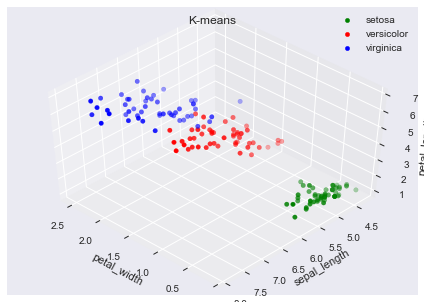

In [12]:
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
dict = {"setosa": 'g', 'versicolor': 'r', 'virginica': 'b'}
for name, species in iris.groupby('species'):
    ax.scatter(species['petal_width'], species['sepal_length'], species['petal_length'], c=dict[name], label=name) 
ax.set_xlabel('petal_width')
ax.set_ylabel('sepal_length')
ax.set_zlabel('petal_length')
ax.set_title('K-means')
ax.legend()
plt.show()

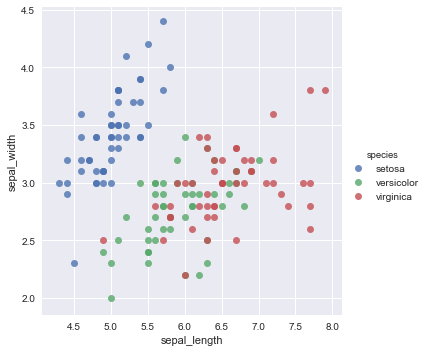

In [13]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, fit_reg=False, hue='species')

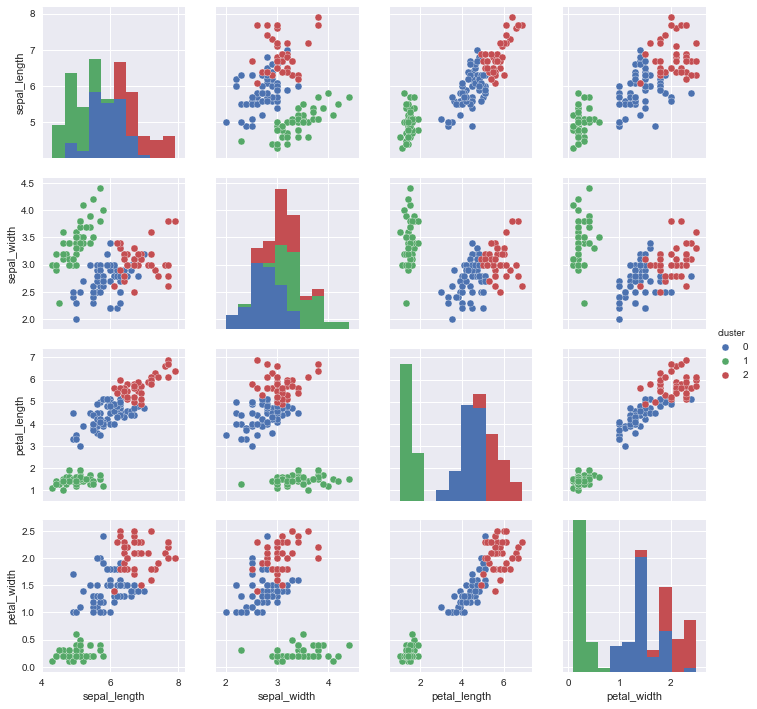

In [14]:
sns.pairplot(iris.drop('species',axis=1), hue='cluster', vars=['sepal_length','sepal_width','petal_length','petal_width'])